In [0]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
!ls

sample_data


## Data Loading

In [0]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Train and Test Split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = X_train.shape

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=D,),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
r = model.fit(X_train,y_train,epochs=100,
              validation_data=(X_test,y_test))

In [14]:
model.evaluate(X_test,y_test,verbose=1)

6/6 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9521


[0.133074089884758, 0.9521276354789734]

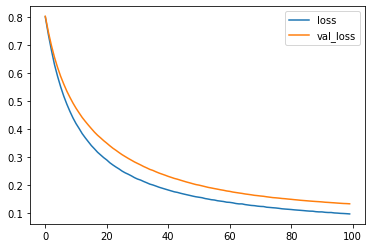

In [15]:
 plt.plot(r.history['loss'],label='loss')
 plt.plot(r.history['val_loss'],label='val_loss')
 plt.legend()

## Making Predictions

In [17]:
P = model.predict(X_test)
print(P)

[[9.49557424e-01]
 [9.71565485e-01]
 [9.66479599e-01]
 [6.35028755e-06]
 [2.75850296e-04]
 [8.44931483e-01]
 [8.58874559e-01]
 [9.81758833e-01]
 [9.92742896e-01]
 [5.96150756e-03]
 [9.06626344e-01]
 [9.93829668e-01]
 [1.87313308e-05]
 [5.75143895e-05]
 [9.99596477e-01]
 [2.93905523e-05]
 [7.60622025e-01]
 [9.75345254e-01]
 [3.42170897e-05]
 [9.62417245e-01]
 [9.89372849e-01]
 [8.66536915e-01]
 [9.77574348e-01]
 [9.54621673e-01]
 [9.96287644e-01]
 [8.95067155e-01]
 [9.76290464e-01]
 [9.10412431e-01]
 [3.80454981e-06]
 [9.89680409e-01]
 [3.04656419e-06]
 [9.92380619e-01]
 [7.56758809e-01]
 [1.56012177e-03]
 [3.36587429e-03]
 [4.03730394e-14]
 [9.89026308e-01]
 [1.11300945e-02]
 [1.09456867e-01]
 [9.78050828e-01]
 [4.39992934e-01]
 [4.58425283e-03]
 [9.97551203e-01]
 [8.09588432e-02]
 [9.92658377e-01]
 [8.79312634e-01]
 [8.84387612e-01]
 [9.25652266e-01]
 [2.25177407e-03]
 [2.62505182e-05]
 [4.56994176e-02]
 [1.53371758e-07]
 [4.31230664e-02]
 [9.93233681e-01]
 [7.53590465e-03]
 [4.672252

In [20]:
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.]


In [21]:
print('Manually calculated accuracy: ',np.mean(P == y_test))
print('Evaluate output: ',model.evaluate(X_test,y_test))

Manually calculated accuracy:  0.9521276595744681
6/6 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9521
Evaluate output:  [0.133074089884758, 0.9521276354789734]
